In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pickle

# load sae features

In [3]:
file_path = '/content/drive/MyDrive/fActs_ts_1L_21M_sheHer.pkl'
with open(file_path, 'rb') as f:
    feature_acts_model_A = pickle.load(f)

In [4]:
file_path = '/content/drive/MyDrive/fActs_ts_2L_33M_sheHer.pkl'
with open(file_path, 'rb') as f:
    feature_acts_model_B = pickle.load(f)

# correlation mat

In [5]:
first_dim_reshaped = feature_acts_model_A.shape[0] * feature_acts_model_A.shape[1]
reshaped_activations_A = feature_acts_model_A.reshape(first_dim_reshaped, feature_acts_model_A.shape[-1]).cpu()
reshaped_activations_B = feature_acts_model_B.reshape(first_dim_reshaped, feature_acts_model_B.shape[-1]).cpu()

In [6]:
reshaped_activations_A.shape
reshaped_activations_B.shape

torch.Size([24960, 16384])

In [7]:
def count_nonzero_features(feature_acts):
    # Count the number of 0s in the tensor
    num_zeros = (feature_acts == 0).sum().item()

    # Count the number of nonzeroes in the tensor
    num_ones = (feature_acts > 0).sum().item()

    # Calculate the percentage of 1s over 0s
    if num_zeros > 0:
        perc_ones_over_total = (num_ones / (num_ones + num_zeros)) * 100
    else:
        perc_ones_over_total = float('inf')  # Handle division by zero
    return perc_ones_over_total
print(count_nonzero_features(reshaped_activations_A))
print(count_nonzero_features(reshaped_activations_B))

0.1506350590632512
35.92024705348871


In [8]:
import torch
import numpy as np

# Select a column from matrix A (e.g., the first column)
column_A = reshaped_activations_A[:, 16244].numpy()

# Compute the correlation of column_A with all columns in B
correlations = []

for i in range(reshaped_activations_B.shape[1]):
    column_B = reshaped_activations_B[:, i].numpy()

    if np.std(column_A) == 0 or np.std(column_B) == 0:
        # Skip columns with zero standard deviation
        correlations.append(np.nan)
    else:
        correlation = np.corrcoef(column_A, column_B)[0, 1]
        correlations.append(correlation)

# Convert the list of correlations to a NumPy array for easy manipulation
correlations = np.array(correlations)

# Remove nan values for the purpose of finding the highest correlation
valid_correlations = np.where(np.isnan(correlations), -np.inf, correlations)

# Get the index of the column in B with the highest correlation
highest_correlation_index = np.argmax(valid_correlations)
highest_correlation_value = correlations[highest_correlation_index]

# Extract the column with the highest correlation
highest_correlation_column = reshaped_activations_B[:, highest_correlation_index]

print(f'Highest correlation value: {highest_correlation_value}')
print(f'Index of the column with highest correlation: {highest_correlation_index}')
print(f'Column with highest correlation:\n {highest_correlation_column}')

Highest correlation value: 0.17201109660131192
Index of the column with highest correlation: 15028
Column with highest correlation:
 tensor([0., 0., 0.,  ..., 0., 0., 0.])


In [9]:
import torch
import numpy as np

# Select a column from matrix A (e.g., the first column)
column_A = reshaped_activations_A[:, 16244].numpy().copy()

# Compute the correlation of column_A with all columns in B
correlations = []

for i in range(reshaped_activations_B.shape[1]):
    column_B = reshaped_activations_B[:, i].numpy().copy()

    if np.std(column_A) == 0 or np.std(column_B) == 0:
        # Skip columns with zero standard deviation
        correlations.append(np.nan)
    else:
        correlation = np.corrcoef(column_A, column_B)[0, 1]
        correlations.append(correlation)

# Convert the list of correlations to a NumPy array for easy manipulation
correlations = np.array(correlations)

# Remove nan values for the purpose of finding the highest correlations
valid_correlations = np.where(np.isnan(correlations), -np.inf, correlations)

# Get the indices of the top 10 columns in B with the highest correlations
top_10_indices = np.argsort(valid_correlations)[-10:][::-1]
top_10_correlations = correlations[top_10_indices]

# Extract the columns with the highest correlations
# top_10_columns = reshaped_activations_B[:, top_10_indices]

# print(f'Top 10 correlation values: {top_10_correlations}')
# print(f'Indices of the columns with top 10 correlations: {top_10_indices}')
# print(f'Columns with top 10 correlations:\n {top_10_columns}')


In [ ]:
top_10_indices

array([15028,  3580,  7634,  2208,  9768,  7110,  8427,   239,  3023,
        5859])

In [ ]:
import torch
import numpy as np

# Select a column from matrix A (e.g., the first column)
column_A = reshaped_activations_A[:, 0].numpy()

# Compute the correlation of column_A with all columns in B
correlations = []

for i in range(reshaped_activations_B.shape[1]):
    column_B = reshaped_activations_B[:, i].numpy()

    if np.std(column_A) == 0 or np.std(column_B) == 0:
        # Skip columns with zero standard deviation
        correlations.append(np.nan)
    else:
        correlation = np.corrcoef(column_A, column_B)[0, 1]
        correlations.append(correlation)

# Convert the list of correlations to a NumPy array for easy manipulation
correlations = np.array(correlations)

# Remove nan values for the purpose of finding the highest correlation
valid_correlations = np.where(np.isnan(correlations), -np.inf, correlations)

# Get the index of the column in B with the highest correlation
highest_correlation_index = np.argmax(valid_correlations)
highest_correlation_value = correlations[highest_correlation_index]

# Extract the column with the highest correlation
highest_correlation_column = reshaped_activations_B[:, highest_correlation_index]

print(f'Highest correlation value: {highest_correlation_value}')
print(f'Index of the column with highest correlation: {highest_correlation_index}')
print(f'Column with highest correlation:\n {highest_correlation_column}')

Highest correlation value: 0.021314771691455767
Index of the column with highest correlation: 7219
Column with highest correlation:
 tensor([0., 0., 0.,  ..., 0., 0., 0.])


In [ ]:
# Get the indices of the top 10 columns in B with the highest correlations
top_10_indices = np.argsort(valid_correlations)[-10:][::-1]
top_10_correlations = correlations[top_10_indices]
top_10_indices

array([ 7219,  2090, 13160,  5793,  9053,  3751,  1351,  1786, 13994,
       10304])

In [ ]:
top_10_correlations

array([0.02131477, 0.02077344, 0.02007804, 0.01984505, 0.01943467,
       0.01938124, 0.01928372, 0.0188254 , 0.01874655, 0.01859463])

In [ ]:
import torch
import numpy as np

# Select a column from matrix A (e.g., the first column)
column_A = reshaped_activations_A[:, 1].numpy()

# Compute the correlation of column_A with all columns in B
correlations = []

for i in range(reshaped_activations_B.shape[1]):
    column_B = reshaped_activations_B[:, i].numpy()

    if np.std(column_A) == 0 or np.std(column_B) == 0:
        # Skip columns with zero standard deviation
        correlations.append(np.nan)
    else:
        correlation = np.corrcoef(column_A, column_B)[0, 1]
        correlations.append(correlation)

# Convert the list of correlations to a NumPy array for easy manipulation
correlations = np.array(correlations)

# Remove nan values for the purpose of finding the highest correlation
valid_correlations = np.where(np.isnan(correlations), -np.inf, correlations)

# Get the index of the column in B with the highest correlation
highest_correlation_index = np.argmax(valid_correlations)
highest_correlation_value = correlations[highest_correlation_index]

# Extract the column with the highest correlation
highest_correlation_column = reshaped_activations_B[:, highest_correlation_index]

print(f'Highest correlation value: {highest_correlation_value}')
print(f'Index of the column with highest correlation: {highest_correlation_index}')
print(f'Column with highest correlation:\n {highest_correlation_column}')

Highest correlation value: 0.07216798760397179
Index of the column with highest correlation: 657
Column with highest correlation:
 tensor([0., 0., 0.,  ..., 0., 0., 0.])


In [ ]:
# Get the indices of the top 10 columns in B with the highest correlations
top_10_indices = np.argsort(valid_correlations)[-10:][::-1]
top_10_correlations = correlations[top_10_indices]
top_10_indices

array([  657,  4223,  9950, 12712,  4451,  7606,  5630,  2945, 12266,
        5642])

# top 10 ind fn

In [10]:
import torch
import numpy as np

def top_ind_from_B(ind):
    # Select a column from matrix A (e.g., the first column)
    column_A = reshaped_activations_B[:, ind].numpy()

    # Compute the correlation of column_A with all columns in B
    correlations = []

    for i in range(reshaped_activations_A.shape[1]):
        column_B = reshaped_activations_A[:, i].numpy()

        if np.std(column_A) == 0 or np.std(column_B) == 0:
            # Skip columns with zero standard deviation
            correlations.append(np.nan)
        else:
            correlation = np.corrcoef(column_A, column_B)[0, 1]
            correlations.append(correlation)

    # Convert the list of correlations to a NumPy array for easy manipulation
    correlations = np.array(correlations)

    # Remove nan values for the purpose of finding the highest correlation
    valid_correlations = np.where(np.isnan(correlations), -np.inf, correlations)

    # Get the index of the column in B with the highest correlation
    # highest_correlation_index = np.argmax(valid_correlations)
    # highest_correlation_value = correlations[highest_correlation_index]

    # # Extract the column with the highest correlation
    # highest_correlation_column = reshaped_activations_B[:, highest_correlation_index]

    # print(f'Highest correlation value: {highest_correlation_value}')
    # print(f'Index of the column with highest correlation: {highest_correlation_index}')
    # print(f'Column with highest correlation:\n {highest_correlation_column}')

    # Get the indices of the top 10 columns in B with the highest correlations
    top_10_indices = np.argsort(valid_correlations)[-10:][::-1]
    top_10_correlations = correlations[top_10_indices]
    return top_10_indices, top_10_correlations

In [ ]:
top_ind_from_B(1786)

array([16251, 13152, 14923, 10373, 16144,  7364,  9425, 15399,  5912,
        3655])

In [11]:
top_ind_from_B(3103)

(array([14923, 16251, 13152, 13166, 10373, 16144,  7364, 15399,  9425,
         5912]),
 array([0.55415695, 0.48495889, 0.45813565, 0.44274656, 0.44002068,
        0.43836193, 0.43768772, 0.43551364, 0.43548672, 0.43543239]))

In [12]:
top_10_indices, top_10_correlations = top_ind_from_B(3103)
print(top_10_indices)
print(top_10_correlations)

[14923 16251 13152 13166 10373 16144  7364 15399  9425  5912]
[0.55415695 0.48495889 0.45813565 0.44274656 0.44002068 0.43836193
 0.43768772 0.43551364 0.43548672 0.43543239]


# plot

In [14]:
import matplotlib.pyplot as plt

In [ ]:
model_A_f_ind = 1
model_B_f_ind = 657

feature_0_actvs_A = reshaped_activations_A[:, model_A_f_ind].numpy()
feature_0_actvs_B = reshaped_activations_B[:, model_B_f_ind].numpy()

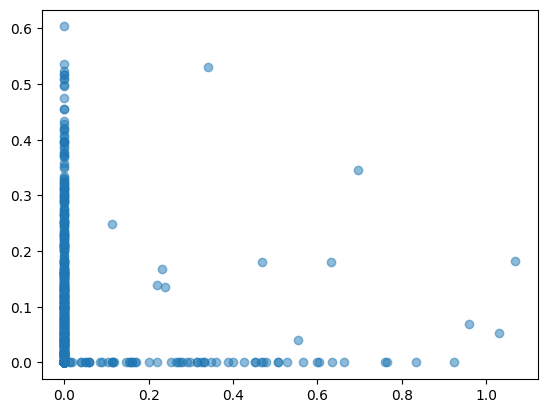

In [ ]:
plt.scatter(feature_0_actvs_A, feature_0_actvs_B, alpha=0.5)

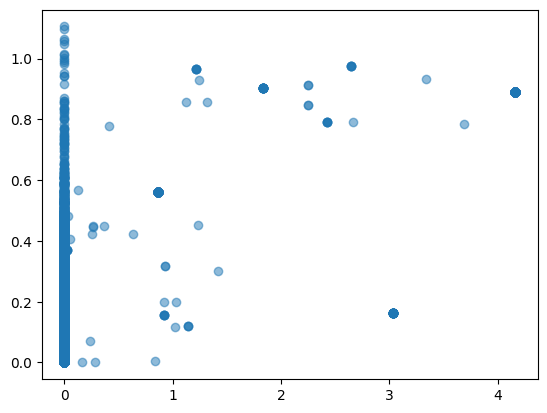

In [ ]:
model_A_f_ind = 16251
model_B_f_ind = 1786

feature_0_actvs_A = reshaped_activations_A[:, model_A_f_ind].numpy()
feature_0_actvs_B = reshaped_activations_B[:, model_B_f_ind].numpy()

plt.scatter(feature_0_actvs_A, feature_0_actvs_B, alpha=0.5)

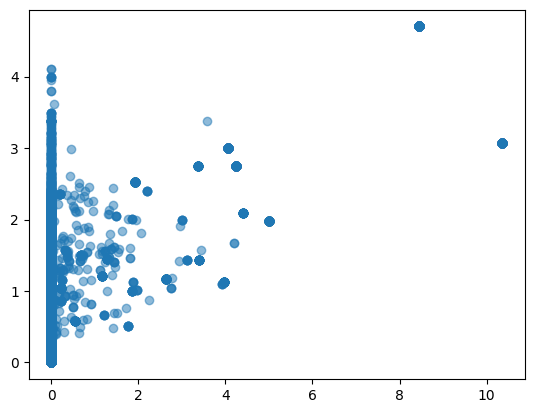

In [ ]:
model_A_f_ind = 14923
model_B_f_ind = 3103

feature_0_actvs_A = reshaped_activations_A[:, model_A_f_ind].numpy()
feature_0_actvs_B = reshaped_activations_B[:, model_B_f_ind].numpy()

plt.scatter(feature_0_actvs_A, feature_0_actvs_B, alpha=0.5)

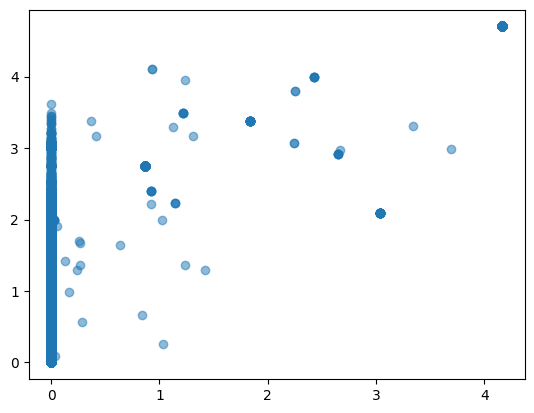

In [ ]:
model_A_f_ind = 16251
model_B_f_ind = 3103

feature_0_actvs_A = reshaped_activations_A[:, model_A_f_ind].numpy()
feature_0_actvs_B = reshaped_activations_B[:, model_B_f_ind].numpy()

corr = np.corrcoef(feature_0_actvs_A, feature_0_actvs_B)[0, 1]
print(corr)

plt.scatter(feature_0_actvs_A, feature_0_actvs_B, alpha=0.5)

0.48495889435659173


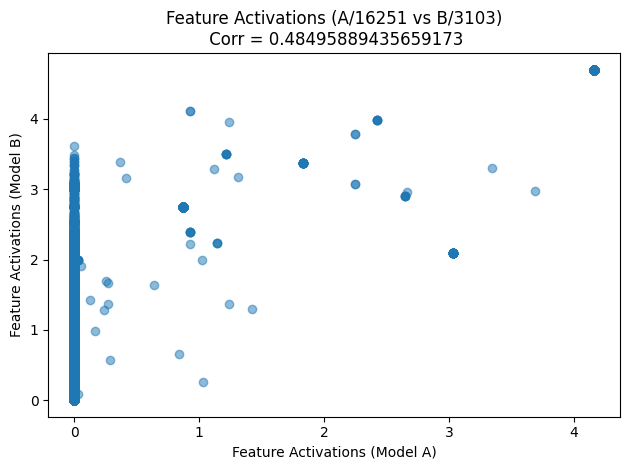

In [18]:
model_A_f_ind = 16251
model_B_f_ind = 3103

feature_0_actvs_A = reshaped_activations_A[:, model_A_f_ind].numpy()
feature_0_actvs_B = reshaped_activations_B[:, model_B_f_ind].numpy()

corr = np.corrcoef(feature_0_actvs_A, feature_0_actvs_B)[0, 1]
print(corr)

plt.scatter(feature_0_actvs_A, feature_0_actvs_B, alpha=0.5)

plt.xlabel('Feature Activations (Model A)')
plt.ylabel('Feature Activations (Model B)')
plt.title('Feature Activations (A/16251 vs B/3103)\n Corr = ' + str(corr))

plt.tight_layout()
plt.show()

# old

In [ ]:
import numpy as np
combined_matrix = np.hstack((reshaped_activations_A, reshaped_activations_B))

# Calculate the correlation matrix
correlation_matrix = np.corrcoef(combined_matrix, rowvar=False)
correlation_matrix.shape

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


(32768, 32768)

In [ ]:
correlation_matrix

array([[ 1.00000000e+00, -6.57419011e-04, -1.96091944e-04, ...,
        -6.10652156e-03,             nan, -6.63219230e-03],
       [-6.57419011e-04,  1.00000000e+00, -5.51748352e-04, ...,
        -1.30551568e-02,             nan, -1.02642306e-02],
       [-1.96091944e-04, -5.51748352e-04,  1.00000000e+00, ...,
         3.23585729e-03,             nan, -7.14365740e-03],
       ...,
       [-6.10652156e-03, -1.30551568e-02,  3.23585729e-03, ...,
         1.00000000e+00,             nan,  1.19419537e-01],
       [            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       [-6.63219230e-03, -1.02642306e-02, -7.14365740e-03, ...,
         1.19419537e-01,             nan,  1.00000000e+00]])

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Transpose the activations to get F vectors of size N and F_2 vectors of size N
actvs1_T = reshaped_activations_A.T  # shape (F, N)
actvs2_T = reshaped_activations_B.T  # shape (F_2, N)

# Calculate cosine similarity between every F vector and every F_2 vector
cosine_sim_matrix = cosine_similarity(actvs1_T, actvs2_T)  # shape (F, F_2)

In [ ]:
cosine_sim_matrix.shape

(16384, 16384)

In [ ]:
import numpy as np

def find_top_pairs_for_row(correlation_matrix, row_index, top_n=5):
    """
    Finds the top N pairs of features with the highest correlation for a specific row.

    Args:
    - correlation_matrix (numpy.ndarray): Correlation matrix of shape (F, F_2)
    - row_index (int): Index of the row to find the top pairs for.
    - top_n (int): Number of top pairs to find. Default is 5.

    Returns:
    - top_pairs (list of tuples): List of tuples where each tuple contains
                                  (index of feature in row, index of feature in column, correlation value)
    """
    # Extract the specific row from the correlation matrix
    row_values = correlation_matrix[row_index]

    # Get the indices of the top N highest values in the row
    top_indices = np.argsort(row_values)[-top_n:][::-1]

    # Collect the top pairs
    top_pairs = [(row_index, i, row_values[i]) for i in top_indices]

    return top_pairs

# Specify the row index for which to find the top pairs
row_index = 16244
top_pairs = find_top_pairs_for_row(correlation_matrix, row_index, top_n=5)

for pair in top_pairs:
    print(f"Feature Index in Row: {pair[0]}, Feature Index in Column: {pair[1]}, Correlation: {pair[2]}")

Feature Index in Row: 16244, Feature Index in Column: 25342, Correlation: nan
Feature Index in Row: 16244, Feature Index in Column: 25344, Correlation: nan
Feature Index in Row: 16244, Feature Index in Column: 1371, Correlation: nan
Feature Index in Row: 16244, Feature Index in Column: 12461, Correlation: nan
Feature Index in Row: 16244, Feature Index in Column: 12462, Correlation: nan


In [ ]:
import numpy as np
import pandas as pd

def find_top_pairs_for_row(correlation_matrix, row_index, top_n=5):
    """
    Finds the top N pairs of features with the highest correlation for a specific row.

    Args:
    - correlation_matrix (numpy.ndarray): Correlation matrix of shape (F, F_2)
    - row_index (int): Index of the row to find the top pairs for.
    - top_n (int): Number of top pairs to find. Default is 5.

    Returns:
    - top_pairs (list of tuples): List of tuples where each tuple contains
                                  (index of feature in row, index of feature in column, correlation value)
    """
    # Extract the specific row from the correlation matrix
    row_values = correlation_matrix[row_index]

    # Check for NaN values and handle them
    if np.isnan(row_values).any():
        print("NaN values found in the correlation matrix. Handling them by setting them to zero.")
        row_values = np.nan_to_num(row_values)

    # Get the indices of the top N highest values in the row
    top_indices = np.argsort(row_values)[-top_n:][::-1]

    # Collect the top pairs
    top_pairs = [(row_index, i, row_values[i]) for i in top_indices]

    return top_pairs

# Example data with potential issues handled
matrix1 = np.array([[1, 2, 3],
                    [4, 5, 6],
                    [7, 8, 9]])

matrix2 = np.array([[9, 8, 7],
                    [6, 5, 4],
                    [3, 2, 1]])

# Combine matrices and handle potential issues
combined_matrix = np.hstack((matrix1, matrix2))

# Create DataFrame for easier handling of missing values and constants
df = pd.DataFrame(combined_matrix)

# Drop columns with constant values
df = df.loc[:, (df != df.iloc[0]).any()]

# Fill or drop NaNs if any (example here fills NaNs with the mean of the column)
df = df.fillna(df.mean())

# Calculate the correlation matrix
correlation_matrix = df.corr().to_numpy()

# Specify the row index for which to find the top pairs
row_index = 0
top_pairs = find_top_pairs_for_row(correlation_matrix, row_index, top_n=5)

for pair in top_pairs:
    print(f"Feature Index in Row: {pair[0]}, Feature Index in Column: {pair[1]}, Correlation: {pair[2]}")


In [ ]:
# Find the highest cosine similarity value
highest_cosine_sim = np.max(cosine_sim_matrix)

# Find the indices of the vectors that have the highest cosine similarity
indices = np.unravel_index(np.argmax(cosine_sim_matrix, axis=None), cosine_sim_matrix.shape)
highest_cosine_sim_vectors = (indices[0], indices[1])  # (index in actvs1_T, index in actvs2_T)

print("Highest Cosine Similarity:", highest_cosine_sim)
print("Indices of highest similarity vectors:", highest_cosine_sim_vectors)

Highest Cosine Similarity: 1.0000001
Indices of highest similarity vectors: (3383, 565)


In [ ]:
def find_top_pairs(cosine_sim_matrix, top_n=5):
    """
    Finds the top N pairs of features with the highest cosine similarity.

    Args:
    - cosine_sim_matrix (numpy.ndarray): Cosine similarity matrix of shape (F, F_2)
    - top_n (int): Number of top pairs to find. Default is 5.

    Returns:
    - top_pairs (list of tuples): List of tuples where each tuple contains
                                  (index of feature in A, index of feature in B, cosine similarity value)
    """
    # Flatten the matrix and get the indices of the top N highest values
    flat_indices = np.argsort(cosine_sim_matrix, axis=None)[-top_n:][::-1]

    # Convert flat indices back to 2D indices
    top_pairs = []
    for idx in flat_indices:
        i, j = np.unravel_index(idx, cosine_sim_matrix.shape)
        top_pairs.append((i, j, cosine_sim_matrix[i, j]))

    return top_pairs

# top_pairs = find_top_pairs(cosine_sim_matrix)
top_pairs = find_top_pairs(correlation_matrix)

print("Top 5 pairs with the highest cosine similarity:")
for feature_A, feature_B, sim in top_pairs:
    print(f"Feature {feature_A} in A and Feature {feature_B} in B: Cosine similarity = {sim}")

Top 5 pairs with the highest cosine similarity:
Feature 2838 in A and Feature 1954 in B: Cosine similarity = nan
Feature 2838 in A and Feature 1955 in B: Cosine similarity = nan
Feature 2838 in A and Feature 1956 in B: Cosine similarity = nan
Feature 2838 in A and Feature 1957 in B: Cosine similarity = nan
Feature 2838 in A and Feature 1958 in B: Cosine similarity = nan


In [ ]:
def find_top_pairs(correlation_matrix, top_n=5):
    """
    Finds the top N pairs of features with the highest correlation.

    Args:
    - correlation_matrix (numpy.ndarray): Correlation matrix of shape (F, F_2)
    - top_n (int): Number of top pairs to find. Default is 5.

    Returns:
    - top_pairs (list of tuples): List of tuples where each tuple contains
                                  (index of feature in A, index of feature in B, correlation value)
    """
    # Ensure the correlation matrix is square or rectangular
    if correlation_matrix.shape[0] != correlation_matrix.shape[1]:
        raise ValueError("Correlation matrix must be square or rectangular.")

    # Flatten the matrix and get the indices of the top N highest values
    flat_indices = np.argsort(correlation_matrix, axis=None)[-top_n:][::-1]

    # Convert flat indices back to 2D indices
    top_pairs = []
    for idx in flat_indices:
        i, j = np.unravel_index(idx, correlation_matrix.shape)
        top_pairs.append((i, j, correlation_matrix[i, j]))

    return top_pairs

top_pairs = find_top_pairs(correlation_matrix, top_n=5)
for pair in top_pairs:
    print(f"Feature A Index: {pair[0]}, Feature B Index: {pair[1]}, Correlation: {pair[2]}")

Feature A Index: 2838, Feature B Index: 1954, Correlation: nan
Feature A Index: 2838, Feature B Index: 1955, Correlation: nan
Feature A Index: 2838, Feature B Index: 1956, Correlation: nan
Feature A Index: 2838, Feature B Index: 1957, Correlation: nan
Feature A Index: 2838, Feature B Index: 1958, Correlation: nan


In [ ]:
model_A_f_ind = 3383
model_B_f_ind = 14535

feature_0_actvs_A = reshaped_activations_A[:, model_A_f_ind].numpy()
feature_0_actvs_B = reshaped_activations_B[:, model_B_f_ind].numpy()

In [ ]:
feature_0_actvs_A.shape

(16384,)

In [ ]:
cosine_sim_matrix[model_A_f_ind][model_B_f_ind]

1.0000001

In [ ]:
np.corrcoef(feature_0_actvs_A, feature_0_actvs_B)

array([[1., 1.],
       [1., 1.]])

In [ ]:
def count_nonzero_features(feature_acts):
    # Count the number of 0s in the tensor
    num_zeros = (feature_acts == 0).sum().item()

    # Count the number of nonzeroes in the tensor
    num_ones = (feature_acts > 0).sum().item()

    # Calculate the percentage of 1s over 0s
    if num_zeros > 0:
        perc_ones_over_total = (num_ones / (num_ones + num_zeros)) * 100
    else:
        perc_ones_over_total = float('inf')  # Handle division by zero
    # return perc_ones_over_total
    return num_ones, num_zeros

In [ ]:
feature_0_actvs_A

array([0.01403481, 0.        , 0.        , ..., 0.        , 0.        ,
       0.        ], dtype=float32)

In [ ]:
count_nonzero_features(feature_0_actvs_A)

(32, 16352)

In [ ]:
feature_0_actvs_B

array([0.03616735, 0.        , 0.        , ..., 0.        , 0.        ,
       0.        ], dtype=float32)

In [ ]:
count_nonzero_features(feature_0_actvs_B)

(32, 16352)

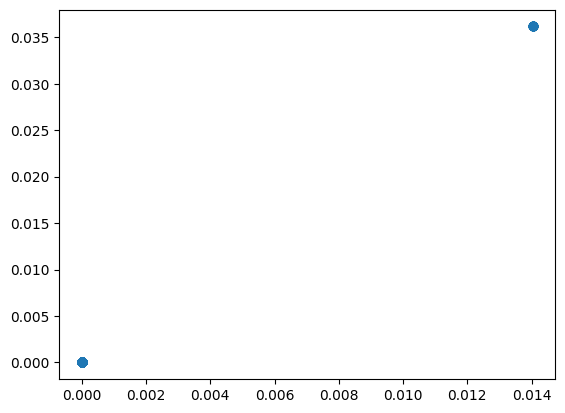

In [ ]:
plt.scatter(feature_0_actvs_A, feature_0_actvs_B, alpha=0.5)

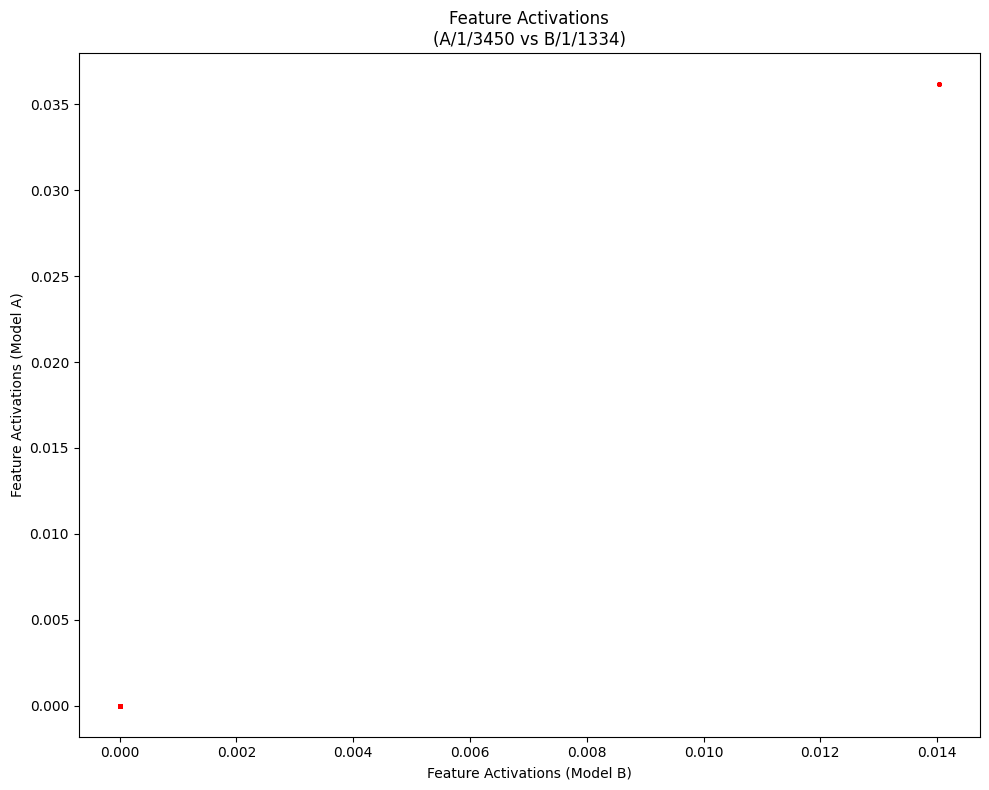

In [ ]:
import matplotlib.pyplot as plt

# Calculate correlation
correlation = np.corrcoef(feature_0_actvs_A, feature_0_actvs_B)[0, 1]

# Create the scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(feature_0_actvs_A, feature_0_actvs_B, alpha=0.5, color='red', s=5)

# Set labels and title
plt.xlabel('Feature Activations (Model B)')
plt.ylabel('Feature Activations (Model A)')
plt.title('Feature Activations\n(A/1/3450 vs B/1/1334)')

# Add correlation text
# plt.text(0.05, 0.95, f'Correlation={correlation:.2f}',
#          transform=plt.gca().transAxes,
#          bbox=dict(facecolor='orange', alpha=0.5),
#          verticalalignment='top')

# Add histograms on the sides
# left, bottom, width, height = [0.68, 0.68, 0.2, 0.2]
# ax2 = plt.axes([left, bottom, width, height])
# ax2.hist(feature_0_actvs_B, bins=50, orientation='vertical', color='red', alpha=0.5)
# ax2.axis('off')

# left, bottom, width, height = [0.1, 0.1, 0.2, 0.58]
# ax3 = plt.axes([left, bottom, width, height])
# ax3.hist(feature_0_actvs_A, bins=50, orientation='horizontal', color='red', alpha=0.5)
# ax3.axis('off')

plt.tight_layout()
plt.show()